In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
#%matplotlib inline for static images in notebooks
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans

# Data Read

In [ ]:
df= pd.read_excel("project_data.xlsx",header=0) # I read data

In [ ]:
df.head() # I showed first 5 rows with head()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
# I converted symbolic attributes to meaningful data by using map
headers=["Status of existing checking account","Duration in month","Credit history",         "Purpose","Credit amount","Savings account/bonds","Present employment since",         "Installment rate in percentage of disposable income","Personal status and sex",         "Other debtors / guarantors","Present residence since","Property","Age in years",        "Other installment plans","Housing","Number of existing credits at this bank",        "Job","Number of people being liable to provide maintenance for","Telephone","foreign worker","Risk"]
df.columns=headers

Status_of_existing_checking_account={'A14':"no checking account",'A11':"<0 EUR", 'A12': "0 <= <200 EUR",'A13':">= 200 EUR " }
df["Status of existing checking account"]=df["Status of existing checking account"].map(Status_of_existing_checking_account)

Credit_history={"A34":"critical account","A33":"delay in paying off","A32":"existing credits paid back duly till now","A31":"all credits at this bank paid back duly","A30":"no credits taken"}
df["Credit history"]=df["Credit history"].map(Credit_history)

Purpose={"A40" : "car (new)", "A41" : "car (used)", "A42" : "furniture/equipment", "A43" :"radio/television" , "A44" : "domestic appliances", "A45" : "repairs", "A46" : "education", 'A47' : 'vacation','A48' : 'retraining','A49' : 'business','A410' : 'others'}
df["Purpose"]=df["Purpose"].map(Purpose)

Saving_account={"A65" : "no savings account","A61" :"<100 EUR","A62" : "100 <= <500 EUR","A63" :"500 <= < 1000 EUR", "A64" :">= 1000 EUR"}
df["Savings account/bonds"]=df["Savings account/bonds"].map(Saving_account)

Present_employment={'A75':">=7 years", 'A74':"4<= <7 years",  'A73':"1<= < 4 years", 'A72':"<1 years",'A71':"unemployed"}
df["Present employment since"]=df["Present employment since"].map(Present_employment)

Personal_status_and_sex={ 'A95':"female:single",'A94':"male:married/widowed",'A93':"male:single", 'A92':"female:divorced/separated/married", 'A91':"male:divorced/separated"}
df["Personal status and sex"]=df["Personal status and sex"].map(Personal_status_and_sex)

Other_debtors_guarantors={'A101':"none", 'A102':"co-applicant", 'A103':"guarantor"}
df["Other debtors / guarantors"]=df["Other debtors / guarantors"].map(Other_debtors_guarantors)

Property={'A121':"real estate", 'A122':"savings agreement/life insurance", 'A123':"car or other", 'A124':"unknown / no property"}
df["Property"]=df["Property"].map(Property)

Other_installment_plans={'A143':"none", 'A142':"store", 'A141':"bank"}
df["Other installment plans"]=df["Other installment plans"].map(Other_installment_plans)

Housing={'A153':"for free", 'A152':"own", 'A151':"rent"}
df["Housing"]=df["Housing"].map(Housing)
Job={'A174':"management/ highly qualified employee", 'A173':"skilled employee / official", 'A172':"unskilled - resident", 'A171':"unemployed/ unskilled  - non-resident"}
df["Job"]=df["Job"].map(Job)

Telephone={'A192':"yes", 'A191':"none"}
df["Telephone"]=df["Telephone"].map(Telephone)

foreign_worker={'A201':"yes", 'A202':"no"}
df["foreign worker"]=df["foreign worker"].map(foreign_worker)

risk={1:"Good Customer", 2:"Bad Customer"}
df["Risk"]=df["Risk"].map(risk)

df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Risk
0,<0 EUR,6,critical account,radio/television,1169,no savings account,>=7 years,4,male:single,none,4,real estate,67,none,own,2,skilled employee / official,1,yes,yes,Good Customer
1,0 <= <200 EUR,48,existing credits paid back duly till now,radio/television,5951,<100 EUR,1<= < 4 years,2,female:divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad Customer
2,no checking account,12,critical account,education,2096,<100 EUR,4<= <7 years,2,male:single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good Customer
3,<0 EUR,42,existing credits paid back duly till now,furniture/equipment,7882,<100 EUR,4<= <7 years,2,male:single,guarantor,4,savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,Good Customer
4,<0 EUR,24,delay in paying off,car (new),4870,<100 EUR,1<= < 4 years,3,male:single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bad Customer


# Exploratory Data Analysis-EDA

In [ ]:
#no null data
df.isnull().sum()


Status of existing checking account                         0
Duration in month                                           0
Credit history                                              0
Purpose                                                     0
Credit amount                                               0
Savings account/bonds                                       0
Present employment since                                    0
Installment rate in percentage of disposable income         0
Personal status and sex                                     0
Other debtors / guarantors                                  0
Present residence since                                     0
Property                                                    0
Age in years                                                0
Other installment plans                                     0
Housing                                                     0
Number of existing credits at this bank                     0
Job     

In [ ]:
# Looked at the descriptive statistics of the data
df.describe(include='all')

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Risk
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000
unique,4,NaN,5,10,NaN,5,5,NaN,4,3,NaN,4,NaN,3,3,NaN,4,NaN,2,2,2
top,no checking account,NaN,existing credits paid back duly till now,radio/television,NaN,<100 EUR,1<= < 4 years,NaN,male:single,none,NaN,car or other,NaN,none,own,NaN,skilled employee / official,NaN,none,yes,Good Customer
freq,394,NaN,530,280,NaN,603,339,NaN,548,907,NaN,332,NaN,814,713,NaN,630,NaN,596,963,700
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,NaN,2.845000,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN,NaN
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,NaN,1.103718,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN,NaN
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,NaN,2.000000,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,NaN,4.000000,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,NaN


In [ ]:
df.dtypes #looked datatypes

Status of existing checking account                         object
Duration in month                                            int64
Credit history                                              object
Purpose                                                     object
Credit amount                                                int64
Savings account/bonds                                       object
Present employment since                                    object
Installment rate in percentage of disposable income          int64
Personal status and sex                                     object
Other debtors / guarantors                                  object
Present residence since                                      int64
Property                                                    object
Age in years                                                 int64
Other installment plans                                     object
Housing                                                     ob

In [ ]:
#Found unique values for each column to understand which column is categorical and which one is Continuous
#Typically if the count of(unique values) are low then the variable is likely to be a category otherwise continuous
#I saw credit amount,duration in month and age in years columns are continuous quantitative.
#Although Number of existing credits at this bank,   Number of people being liable to provide maintenance for     ,  
#Installment rate in percentage of disposable income ,    
#Present residence since columns are quantitative but their unique counts are too low. So I thought these columns are like categorical.                                  
#Object type columns are qualitative.

df.nunique()

Status of existing checking account                           4
Duration in month                                            33
Credit history                                                5
Purpose                                                      10
Credit amount                                               921
Savings account/bonds                                         5
Present employment since                                      5
Installment rate in percentage of disposable income           4
Personal status and sex                                       4
Other debtors / guarantors                                    3
Present residence since                                       4
Property                                                      4
Age in years                                                 53
Other installment plans                                       3
Housing                                                       3
Number of existing credits at this bank 

Good Customer    700
Bad Customer     300
Name: Risk, dtype: int64


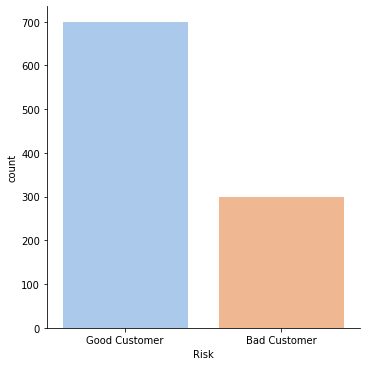

In [ ]:
print(df["Risk"].value_counts())
sns.catplot(x="Risk", kind="count", palette="pastel", data=df)
#I see 700 customers are labeled as Good Customer 300 customers are labeled Bad customer

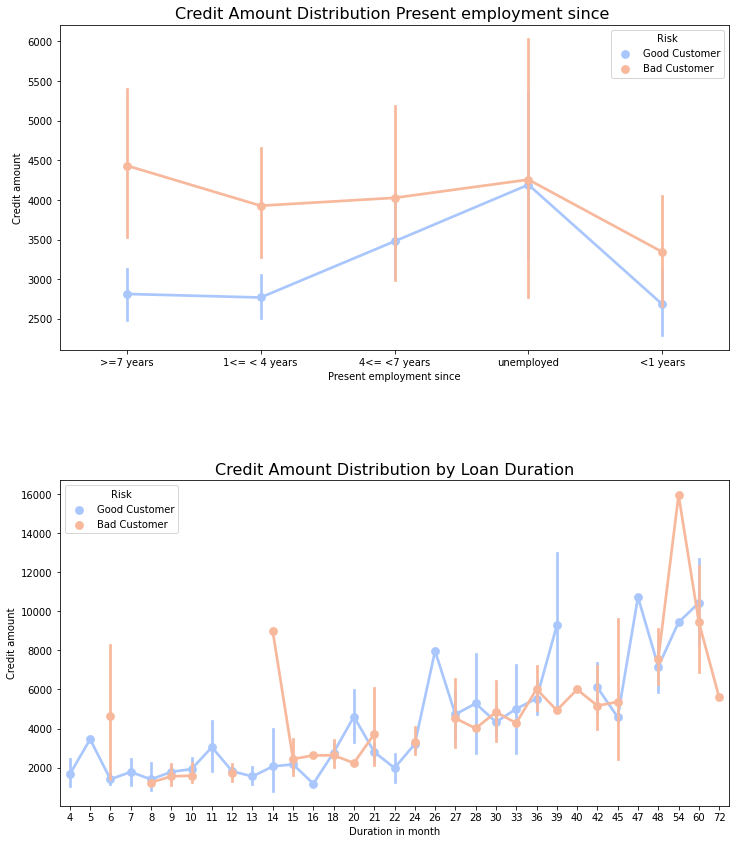

In [ ]:
#credit amount distribution present employment since, duration

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,14))

sns.pointplot(x="Present employment since", y="Credit amount", data=df, hue="Risk", palette="coolwarm", ax=ax1)
sns.pointplot(x="Duration in month", y="Credit amount", data=df, hue="Risk", palette="coolwarm", ax=ax2)

ax1.set_title("Credit Amount Distribution Present employment since ", fontsize=16)
ax2.set_title("Credit Amount Distribution by Loan Duration", fontsize=16)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc64306c1d0>,
      dtype=object)

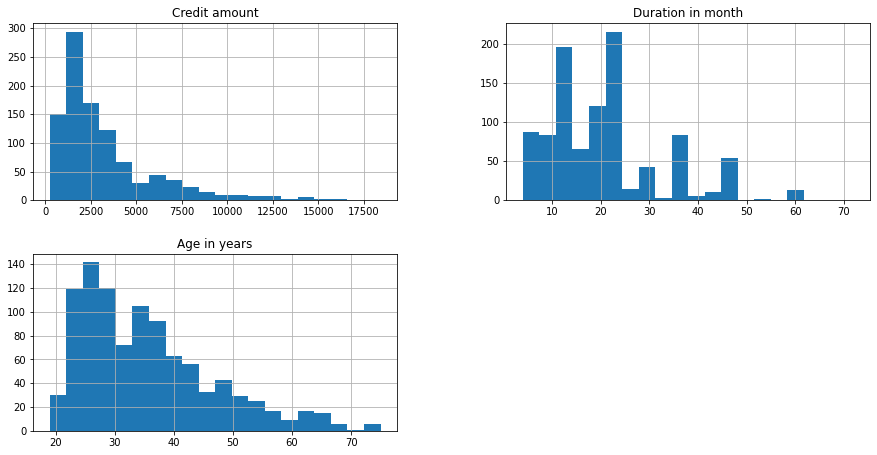

In [ ]:

# distribution of'Credit amount','Duration in month','Age in years' 
df.hist(['Credit amount','Duration in month','Age in years'],bins = 20,figsize=(15,7.5))
#The X-axis shows the range of values and Y-axis represent the number of values in that range. 
#For example, in the histogram of "age", there are around 380 rows in data that has age between 20 to 30.


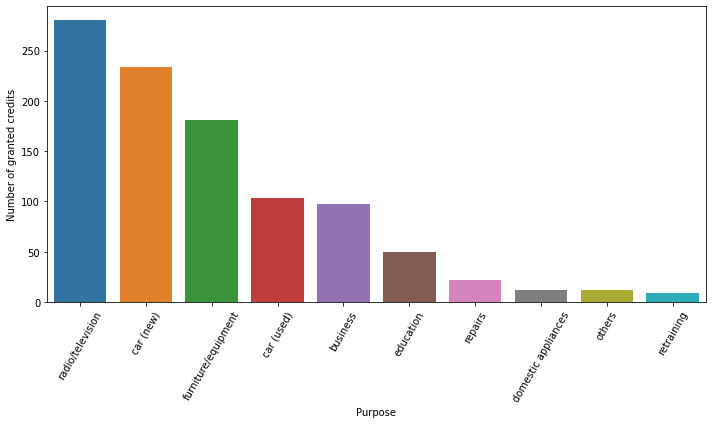

In [ ]:
#Number of credits according to purpose
n_credits = df.groupby("Purpose")["Age in years"].count().rename("Count").reset_index()
n_credits.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
bar = sns.barplot(x="Purpose",y="Count",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel("Number of granted credits")
plt.tight_layout()


Text(0.5, 1.0, 'Present employment since')

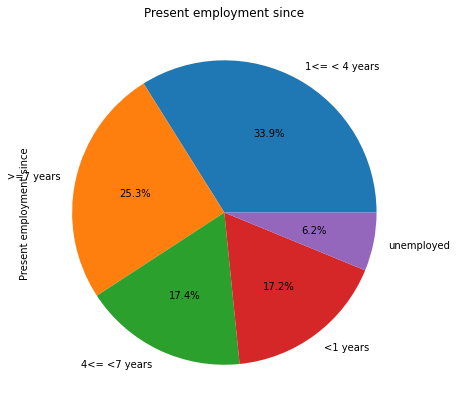

In [ ]:
# present employment since
fig = plt.figure(figsize=(7,7))   
df['Present employment since'].value_counts().plot(kind = 'pie', autopct='%.1f%%',y=None)
#plt.xlabel(">=7 years", "4<= <7 years", "1<= < 4 years", "<1 years","unemployed")
#plt.ylabel(" ", fontsize = 20)
plt.title("Present employment since")
#print("") 

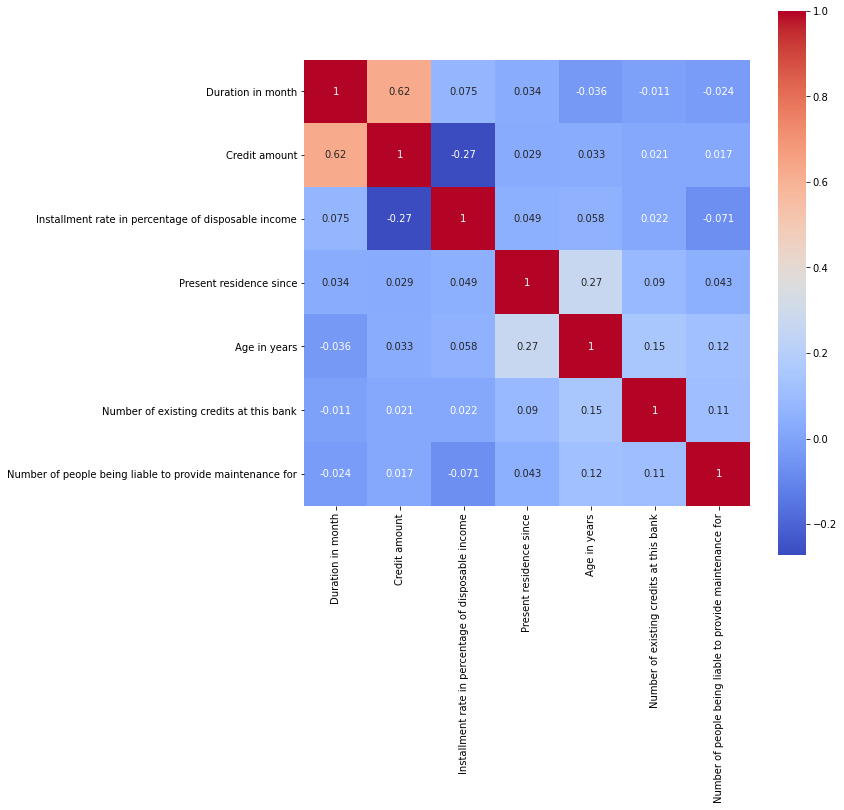

In [ ]:
#correlation between numeric columns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()


# Feature Selection


Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable. 
Assumption(H0):There is NO relation between the given variables.
ANOVA Test result:Probability of H0 being true. I made variance analysis using anova test for continuous columns (credit amount,durationin month and age in years) and target variable(Risk). If the ANOVA P-Value is<0.05, that means we can reject H0 and we can say this column is correlated with target variable Otherwise is NOT correlated with’, TargetVariable.



I looked numeric values they are continusly or not If not I think that they are like categorical values
Installment rate in percentage of disposable income,Present residence since,number of existing credits at this bank,Number of people being liable to provide maintenance for  are not continous.

'Credit amount','Duration in month','Age in years' are continous 


In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(df['Risk'])[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['Credit amount','Duration in month','Age in years']
FunctionAnova(inpData=df, TargetVariable='Risk', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

Credit amount is correlated with Risk | P-Value: 8.797572373533373e-07
Duration in month is correlated with Risk | P-Value: 6.488049877187189e-12
Age in years is correlated with Risk | P-Value: 0.003925339398278295


['Credit amount', 'Duration in month', 'Age in years']

Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variables.Assumption(H0):The two columns are NOT related to each other Chi-Square Test Result:The Probability of H0 being True made Chi-Square test to check the correlation between Categorical columns and target data.  If the P-Value is<0.05, that means we can reject H0 and we can say this column is correlated with target variable.  Otherwise this column is NOT correlated with Target(Risk) variable.

In [ ]:
# Writing a function to find the correlation of all categorical variables with the Target variable

def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)
CategoricalVariables=['Status of existing checking account','Credit history','Purpose',	'Savings account/bonds','Present employment since',	'Personal status and sex',	'Other debtors / guarantors',	'Property','Other installment plans','Housing',	'Job','Telephone','foreign worker','Installment rate in percentage of disposable income','Present residence since','Number of existing credits at this bank','Number of people being liable to provide maintenance for']
# Calling the function
FunctionChisq(inpData=df, 
              TargetVariable='Risk',
              CategoricalVariablesList= CategoricalVariables)

Status of existing checking account is correlated with Risk | P-Value: 1.2189020722893755e-26
Credit history is correlated with Risk | P-Value: 1.2791872956750918e-12
Purpose is correlated with Risk | P-Value: 0.00011574910079691635
Savings account/bonds is correlated with Risk | P-Value: 2.761214238568249e-07
Present employment since is correlated with Risk | P-Value: 0.0010454523491402522
Personal status and sex is correlated with Risk | P-Value: 0.02223800546926877
Other debtors / guarantors is correlated with Risk | P-Value: 0.036055954027247206
Property is correlated with Risk | P-Value: 2.8584415733250017e-05
Other installment plans is correlated with Risk | P-Value: 0.0016293178186473534
Housing is correlated with Risk | P-Value: 0.00011167465374597684
Job is NOT correlated with Risk | P-Value: 0.5965815918843431
Telephone is NOT correlated with Risk | P-Value: 0.2788761543035742
foreign worker is correlated with Risk | P-Value: 0.015830754902852885
Installment rate in percentag

['Status of existing checking account',
 'Credit history',
 'Purpose',
 'Savings account/bonds',
 'Present employment since',
 'Personal status and sex',
 'Other debtors / guarantors',
 'Property',
 'Other installment plans',
 'Housing',
 'foreign worker']

In [ ]:
# After feature selection part I selected columns that I will use in ML algorithms.
selectedcolumns=['Status of existing checking account',
 'Credit history',
 'Purpose',
 'Savings account/bonds',
 'Present employment since',
 'Personal status and sex',
 'Other debtors / guarantors',
 'Property',
 'Other installment plans',
 'Housing',
 'foreign worker','Credit amount', 'Duration in month', 'Age in years','Risk']
dfselected=df[selectedcolumns]
dfselectedfirst=dfselected

# Preprocessing


In [ ]:

from sklearn.preprocessing import MinMaxScaler # used minmax scaler for numeric variables.

numerics = ['int','float']
data1 = dfselected.select_dtypes(include=numerics)

scaler = MinMaxScaler()
scaler.fit(data1)
data_scale = scaler.transform(data1)
data_scale = pd.DataFrame(data_scale, columns=data1.columns)
data_scale.head()

,Credit amount,Duration in month,Age in years
0,0.050567,0.029412,0.857143
1,0.313690,0.647059,0.053571
2,0.101574,0.117647,0.535714
3,0.419941,0.558824,0.464286
4,0.254209,0.294118,0.607143


In [ ]:
dfselected['foreign worker'] = pd.get_dummies(dfselected['foreign worker'], drop_first = True)
df #get dummies for foreign worker

# 1 yes
# 0 none


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Risk
0,<0 EUR,6,critical account,radio/television,1169,no savings account,>=7 years,4,male:single,none,4,real estate,67,none,own,2,skilled employee / official,1,yes,yes,Good Customer
1,0 <= <200 EUR,48,existing credits paid back duly till now,radio/television,5951,<100 EUR,1<= < 4 years,2,female:divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad Customer
2,no checking account,12,critical account,education,2096,<100 EUR,4<= <7 years,2,male:single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good Customer
3,<0 EUR,42,existing credits paid back duly till now,furniture/equipment,7882,<100 EUR,4<= <7 years,2,male:single,guarantor,4,savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,Good Customer
4,<0 EUR,24,delay in paying off,car (new),4870,<100 EUR,1<= < 4 years,3,male:single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bad Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,12,existing credits paid back duly till now,furniture/equipment,1736,<100 EUR,4<= <7 years,3,female:divorced/separated/married,none,4,real estate,31,none,own,1,unskilled - resident,1,none,yes,Good Customer
996,<0 EUR,30,existing credits paid back duly till now,car (used),3857,<100 EUR,1<= < 4 years,4,male:divorced/separated,none,4,savings agreement/life insurance,40,none,own,1,management/ highly qualified employee,1,yes,yes,Good Customer
997,no checking account,12,existing credits paid back duly till now,radio/television,804,<100 EUR,>=7 years,4,male:single,none,4,car or other,38,none,own,1,skilled employee / official,1,none,yes,Good Customer
998,<0 EUR,45,existing credits paid back duly till now,radio/television,1845,<100 EUR,1<= < 4 years,4,male:single,none,4,unknown / no property,23,none,for free,1,skilled employee / official,1,yes,yes,Bad Customer


In [ ]:

dfselected['Risk'] = pd.get_dummies(dfselected['Risk'], drop_first = True)

# 1 yes
# 0 none
#dfselected

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False)
dfX =dfselected.drop(['Risk'],axis=1) # dfx
dfY=dfselected.Risk #dfy target variable 
encoder=OneHotEncoder(sparse=False)  # object variables converted to numeric data 
for column  in dfX :
    if  dfX.dtypes[column]==np.object:
        dfX_encoded = pd.DataFrame (encoder.fit_transform(dfX[[column]]))
        dfX_encoded.columns = encoder.get_feature_names([column])
        dfX.drop([column] ,axis=1, inplace=True)
        dfX= pd.concat([dfX, dfX_encoded ], axis=1)

columns = ['Duration in month', 'Credit amount','Age in years']
dfxcat=dfX.drop(columns,axis=1)  #numeric data dropped



In [ ]:
dfx_processed = pd.concat([data_scale,dfxcat], axis=1) # data_scale(pre proccessed numeric data and preprocessed categoric data concatted)
dfy_processed=pd.DataFrame(dfY) 

In [ ]:
dfx_processed

,Credit amount,Duration in month,Age in years,foreign worker,Status of existing checking account_0 <= <200 EUR,Status of existing checking account_<0 EUR,Status of existing checking account_>= 200 EUR,Status of existing checking account_no checking account,Credit history_all credits at this bank paid back duly,Credit history_critical account,Credit history_delay in paying off,Credit history_existing credits paid back duly till now,Credit history_no credits taken,Purpose_business,Purpose_car (new),Purpose_car (used),Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_others,Purpose_radio/television,Purpose_repairs,Purpose_retraining,Savings account/bonds_100 <= <500 EUR,Savings account/bonds_500 <= < 1000 EUR,Savings account/bonds_<100 EUR,Savings account/bonds_>= 1000 EUR,Savings account/bonds_no savings account,Present employment since_1<= < 4 years,Present employment since_4<= <7 years,Present employment since_<1 years,Present employment since_>=7 years,Present employment since_unemployed,Personal status and sex_female:divorced/separated/married,Personal status and sex_male:divorced/separated,Personal status and sex_male:married/widowed,Personal status and sex_male:single,Other debtors / guarantors_co-applicant,Other debtors / guarantors_guarantor,Other debtors / guarantors_none,Property_car or other,Property_real estate,Property_savings agreement/life insurance,Property_unknown / no property,Other installment plans_bank,Other installment plans_none,Other installment plans_store,Housing_for free,Housing_own,Housing_rent
0,0.050567,0.029412,0.857143,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.313690,0.647059,0.053571,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.101574,0.117647,0.535714,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.419941,0.558824,0.464286,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.254209,0.294118,0.607143,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.081765,0.117647,0.214286,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
996,0.198470,0.382353,0.375000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
997,0.030483,0.117647,0.339286,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
998,0.087763,0.602941,0.071429,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


# CLASSIFICATION

DECISIONTREE


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, y_test = train_test_split(dfx_processed, dfy_processed, test_size=0.3, random_state=101)
X_train
#With Hyper Parameters Tuning
#2-1,DesicionTree
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
#making the instance
clf= DecisionTreeClassifier(random_state=1234)
#Hyper Parameters Set
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}
#Making models with hyper parameters sets
gsc = GridSearchCV(clf, param_grid=params, n_jobs=-1)
#Learning
gsc.fit(X_train,Y_train.values.ravel())

#The best hyper parameters set
print("Best Hyper Parameters:\n",gsc.best_params_)
#the best estimator is
print("\n Best Estimator is ")
print(gsc.best_estimator_)




Best Hyper Parameters:
 {'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 14, 'random_state': 123}

 Best Estimator is 
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=14,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [ ]:
y_test['Risk'].value_counts()

1    204
0     96
Name: Risk, dtype: int64

In [ ]:
DecisionTree=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [ ]:
#!pip install scikit-learn -U--user
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
from sklearn import tree
#clf = tree.DecisionTreeClassifier(max_depth=4,criterion='gini')
# Creating the model on Training Data

DecisionTree=DecisionTree.fit(X_train,Y_train.values.ravel())
prediction=DecisionTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
DecisionTree_accuracy_score=accuracy_score(y_test,prediction)
print('DecisionTree_accuracy_score',DecisionTree_accuracy_score)
DecisionTree_confusion_matrix=confusion_matrix(y_test,prediction)
print('DecisionTree_confusion_matrix',DecisionTree_confusion_matrix)
DecisionTree_classification_report=metrics.classification_report(y_test,prediction)
print('DecisionTree_classification_report',DecisionTree_classification_report)
DecisionTree_f1_score=f1_score(y_test, prediction)
print('DecisionTree_f1_score',DecisionTree_f1_score)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the KFold cross validation will split the data and automatically choose train/test
kf = KFold(n_splits=10)
DecisionTree_accuracy_score_kfold=cross_val_score(DecisionTree, dfx_processed , dfy_processed.values.ravel(),cv=kf,scoring='accuracy')
print('\nDecisionTree Accuracy values for 10-kfold Cross Validation:\n',DecisionTree_accuracy_score_kfold)

print('\nDecisionTree Final Average Accuracy values for 10-kfold Cross Validation:\n',round(DecisionTree_accuracy_score_kfold.mean(),2))
DecisionTree_f1_score_kfold=cross_val_score(DecisionTree, dfx_processed , dfy_processed.values.ravel(),cv=kf,scoring='f1_weighted')
print('\nDecisionTree F1 values for 10-kfold Cross Validation:\n',DecisionTree_f1_score_kfold)
print('\nDecisionTree Final Average F1 score for 10-kfold Cross Validation:\n',round(DecisionTree_f1_score_kfold.mean(),2))


DecisionTree_accuracy_score 0.7133333333333334
DecisionTree_confusion_matrix [[ 50  46]
 [ 40 164]]
DecisionTree_classification_report               precision    recall  f1-score   support

           0       0.56      0.52      0.54        96
           1       0.78      0.80      0.79       204

    accuracy                           0.71       300
   macro avg       0.67      0.66      0.66       300
weighted avg       0.71      0.71      0.71       300

DecisionTree_f1_score 0.7922705314009661

DecisionTree Accuracy values for 10-kfold Cross Validation:
 [0.75 0.66 0.75 0.61 0.72 0.58 0.62 0.68 0.65 0.68]

DecisionTree Final Average Accuracy values for 10-kfold Cross Validation:
 0.67

DecisionTree F1 values for 10-kfold Cross Validation:
 [0.75705329 0.65352381 0.75516962 0.62976    0.69258741 0.57063063
 0.62337541 0.68246043 0.65750203 0.67390476]

DecisionTree Final Average F1 score for 10-kfold Cross Validation:
 0.67


RANDOMFORESTCLASSIFIER


In [ ]:


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#making the instance
RandomForest=RandomForestClassifier()
#hyper parameters set
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
gsc= GridSearchCV(RandomForest, param_grid=params, n_jobs=-1)
#learning
gsc.fit(X_train, Y_train.values.ravel())
#The best hyper parameters set
print("Best Hyper Parameters:\n",gsc.best_params_)
#the best estimator is
print("\n Best Estimator is ")
print(gsc.best_estimator_)



Best Hyper Parameters:
 {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 30, 'n_jobs': -1, 'random_state': 123}

 Best Estimator is 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [ ]:
RandomForest =RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [ ]:
RandomForest=RandomForest.fit(X_train,Y_train.values.ravel())
prediction=RandomForest.predict(X_test)
from sklearn import metrics
RandomForest_accuracy_score=accuracy_score(y_test,prediction)
print('RandomForest_accuracy_score',RandomForest_accuracy_score)
RandomForest_confusion_matrix=confusion_matrix(y_test,prediction)
print('RandomForest_confusion_matrix',RandomForest_confusion_matrix)
RandomForest_classification_report=metrics.classification_report(y_test,prediction)
print('RandomForest_classification_report',RandomForest_classification_report)
RandomForest_f1_score=f1_score(y_test, prediction)
print('RandomForest_f1_score',RandomForest_f1_score)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the KFold-cross val will split the data and automatically choose train/test
#kfold = KFold(n_splits=10)
#Accuracy_Valueskfold=cross_val_score(DecisionTree, dfx_processed , dfy_processed.values.ravel(),cv=kfold,scoring='accuracy')
kf = KFold(n_splits=10)
RandomForest_accuracy_score_kfold=cross_val_score(RandomForest, dfx_processed , dfy_processed.values.ravel(),cv=kf,scoring='accuracy')
print('\n RandomForest Accuracy values for 10-kfold Cross Validation:\n',RandomForest_accuracy_score_kfold)

print('\n RandomForest Final Average Accuracy values for 10-kfold Cross Validation:\n',round(RandomForest_accuracy_score_kfold.mean(),2))
RandomForest_f1_score_kfold=cross_val_score(RandomForest, dfx_processed , dfy_processed.values.ravel(),cv=kf,scoring='f1_weighted')
print('\n RandomForest F1 values for 10-kfold Cross Validation:\n',RandomForest_f1_score_kfold)
print('\nRandomForest Final Average F1 score for 10-kfold Cross Validation:\n',round(RandomForest_f1_score_kfold.mean(),2))


RandomForest_accuracy_score 0.73
RandomForest_confusion_matrix [[ 35  61]
 [ 20 184]]
RandomForest_classification_report               precision    recall  f1-score   support

           0       0.64      0.36      0.46        96
           1       0.75      0.90      0.82       204

    accuracy                           0.73       300
   macro avg       0.69      0.63      0.64       300
weighted avg       0.71      0.73      0.71       300

RandomForest_f1_score 0.8195991091314032

 RandomForest Accuracy values for 10-kfold Cross Validation:
 [0.82 0.77 0.76 0.74 0.76 0.72 0.7  0.78 0.77 0.75]

 RandomForest Final Average Accuracy values for 10-kfold Cross Validation:
 0.76

 RandomForest F1 values for 10-kfold Cross Validation:
 [0.81743421 0.74621976 0.76342105 0.74265177 0.724      0.69066667
 0.68       0.75946667 0.76306251 0.73341035]

RandomForest Final Average F1 score for 10-kfold Cross Validation:
 0.74


In [ ]:
#https://www.ritchieng.com/machine-learning-cross-validation/

SVM


In [ ]:


#With Hyper Parameters Tuning
#2-3,SVM
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#making the instance
svm=svm.SVC()
#Hyper Parameters Set
params = {'C': [6,7,8,9,10,11,12], 
          'kernel': ['linear','rbf']}
#Making models with hyper parameters sets
gsc = GridSearchCV(svm, param_grid=params, n_jobs=-1)
#Learning
gsc.fit(X_train,Y_train.values.ravel())
#The best hyper parameters set
print("Best Hyper Parameters:\n",gsc.best_params_)
#the best estimator is
print("\n Best Estimator is ")
print(gsc.best_estimator_)
#Prediction
#y_pred=model1.predict(x_test)
#importing the metrics module


Best Hyper Parameters:
 {'C': 6, 'kernel': 'linear'}

 Best Estimator is 
SVC(C=6, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:

from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC


In [ ]:
clf=make_pipeline(SVC(C=6, kernel='linear'))

In [ ]:

# Creating the model on Training Data
SVM=clf.fit(X_train,Y_train.values.ravel())
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data

from sklearn import metrics
SVM_accuracy_score=accuracy_score(y_test,prediction)
print('SVM_accuracy_score',SVM_accuracy_score)
SVM_confusion_matrix=confusion_matrix(y_test,prediction)
print('SVM_confusion_matrix',SVM_confusion_matrix)
SVM_classification_report=metrics.classification_report(y_test,prediction)
print('SVM_classification_report',SVM_classification_report)
SVM_f1_score=f1_score(y_test, prediction)
print('SVM_f1_score',SVM_f1_score)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the KFold cross validation will split the data and automatically choose train/test
#kfold = KFold(n_splits=10)
kf = KFold(n_splits=10)
SVM_accuracy_score_kfold=cross_val_score(SVM, dfx_processed , dfy_processed.values.ravel(),cv=kf,scoring='accuracy')
print('\n SVM Accuracy values for 10-kfold Cross Validation:\n',SVM_accuracy_score_kfold)

print('\n SVM Final Average Accuracy values for 10-kfold Cross Validation:\n',round(SVM_accuracy_score_kfold.mean(),2))
SVM_f1_score_kfold=cross_val_score(SVM, dfx_processed , dfy_processed.values.ravel(),cv=kf,scoring='f1_weighted')
print('\n SVM F1 values for 10-kfold Cross Validation:\n',SVM_f1_score_kfold)
print('\n SVM Final Average F1 score for 10-kfold Cross Validation:\n',round(SVM_f1_score_kfold.mean(),2))

SVM_accuracy_score 0.75
SVM_confusion_matrix [[ 46  50]
 [ 25 179]]
SVM_classification_report               precision    recall  f1-score   support

           0       0.65      0.48      0.55        96
           1       0.78      0.88      0.83       204

    accuracy                           0.75       300
   macro avg       0.71      0.68      0.69       300
weighted avg       0.74      0.75      0.74       300

SVM_f1_score 0.8267898383371823

 SVM Accuracy values for 10-kfold Cross Validation:
 [0.84 0.67 0.76 0.77 0.76 0.78 0.62 0.8  0.77 0.77]

 SVM Final Average Accuracy values for 10-kfold Cross Validation:
 0.75

 SVM F1 values for 10-kfold Cross Validation:
 [0.8351214  0.64810166 0.75608392 0.7658375  0.74170525 0.76646766
 0.60669711 0.79388052 0.76610658 0.76150656]

 SVM Final Average F1 score for 10-kfold Cross Validation:
 0.74


KNeighborsClassifier

In [ ]:


from sklearn.neighbors import KNeighborsClassifier
KNeighbors = KNeighborsClassifier()


# Tunning Params
param_grid = {
    'n_neighbors': list(range(1, 10)),
    'leaf_size': list(range(1,10)),
    'weights': [ 'distance', 'uniform' ],
    'algorithm':['auto', 'ball_tree','kd_tree','brute']
}


# Implement GridSearchCV
gsc = GridSearchCV(KNeighbors,  param_grid, cv=5)
# Model Fitting
gsc.fit(X_train, Y_train.values.ravel())

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)





 Best Score is 
0.7342857142857143

 Best Estinator is 
KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='distance')

 Best Parametes are
{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 8, 'weights': 'distance'}


In [ ]:

KNeighbors=KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:

# Creating the model on Training Data
KNN=KNeighbors.fit(X_train,Y_train.values.ravel())
prediction=KNN.predict(X_test)

from sklearn import metrics
KNN_accuracy_score=accuracy_score(y_test,prediction)
print('KNN_accuracy_score',KNN_accuracy_score)
KNN_confusion_matrix=confusion_matrix(y_test,prediction)
print('KNN_confusion_matrix',KNN_confusion_matrix)
KNN_classification_report=metrics.classification_report(y_test,prediction)
print('KNN_classification_report',KNN_classification_report)
KNN_f1_score=f1_score(y_test, prediction)
print('KNN_f1_score',KNN_f1_score)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K Fold-cross validation will split the data and automatically choose train/test
kf = KFold(n_splits=10)
KNN_accuracy_score_kfold=cross_val_score(KNN, dfx_processed , dfy_processed.values.ravel(),cv=kf,scoring='accuracy')
print('\n KNN Accuracy values for 10-kfold Cross Validation:\n',KNN_accuracy_score_kfold)

print('\n KNN Final Average Accuracy values for 10-kfold Cross Validation:\n',round(KNN_accuracy_score_kfold.mean(),2))
KNN_f1_score_kfold=cross_val_score(KNN, dfx_processed , dfy_processed.values.ravel(),cv=kf,scoring='f1_weighted')
print('\n KNN F1 values for 10-kfold Cross Validation:\n',KNN_f1_score_kfold)
print('\n KNN Final Average F1 score for 10-kfold Cross Validation:\n',round(KNN_f1_score_kfold.mean(),2))

KNN_accuracy_score 0.7133333333333334
KNN_confusion_matrix [[ 30  66]
 [ 20 184]]
KNN_classification_report               precision    recall  f1-score   support

           0       0.60      0.31      0.41        96
           1       0.74      0.90      0.81       204

    accuracy                           0.71       300
   macro avg       0.67      0.61      0.61       300
weighted avg       0.69      0.71      0.68       300

KNN_f1_score 0.8105726872246696

 KNN Accuracy values for 10-kfold Cross Validation:
 [0.81 0.68 0.76 0.73 0.78 0.69 0.76 0.76 0.75 0.7 ]

 KNN Final Average Accuracy values for 10-kfold Cross Validation:
 0.74

 KNN F1 values for 10-kfold Cross Validation:
 [0.78419831 0.6360926  0.73398374 0.71697256 0.76322981 0.66005661
 0.73947368 0.72706945 0.71833802 0.67754678]

 KNN Final Average F1 score for 10-kfold Cross Validation:
 0.72


# FREQUENT PATTERN MINING


FREQUENT PATTERN MINING




In [ ]:
dfselected=dfselected.select_dtypes(include=object)

records = []
for i in range (0, dfselected.shape[0]):
    records.append([str(dfselected.values[i,j]) for j in range(0, dfselected.shape[1])])


In [ ]:
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
TE = TransactionEncoder()  
array = TE.fit(records).transform(records)
#building the data frame rows are logical and columns are the items have been purchased 
transf_df = pd.DataFrame(array, columns = TE.columns_)
transf_df

,0 <= <200 EUR,100 <= <500 EUR,1<= < 4 years,4<= <7 years,500 <= < 1000 EUR,<0 EUR,<1 years,<100 EUR,>= 1000 EUR,>= 200 EUR,>=7 years,Bad Customer,Good Customer,all credits at this bank paid back duly,bank,business,car (new),car (used),car or other,co-applicant,critical account,delay in paying off,domestic appliances,education,existing credits paid back duly till now,female:divorced/separated/married,for free,furniture/equipment,guarantor,male:divorced/separated,male:married/widowed,male:single,no,no checking account,no credits taken,no savings account,none,others,own,radio/television,real estate,rent,repairs,retraining,savings agreement/life insurance,store,unemployed,unknown / no property,yes
0,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,True,True,True,False,False,False,False,False,False,False,True
1,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False,False,False,False,False,False,False,True
2,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False,True,False,False,False,False,False,False,False,True
3,False,False,False,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True
4,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,True,False,False,True,False,True,False,True,False,False,False,False,False,False,False,True
996,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True
997,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,True,False,True,True,False,False,False,False,False,False,False,False,True
998,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,True


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets=apriori(transf_df, min_support=0.4, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values('lift', ascending=False)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
rules.head()
print(rules)

                                        antecedents                                      consequents  antecedent support  consequent support  support  confidence      lift  leverage  conviction
22                                      (none, own)                                  (Good Customer)               0.699               0.700    0.518    0.741059  1.058655  0.028700    1.158564
27                                  (Good Customer)                                      (none, own)               0.700               0.699    0.518    0.740000  1.058655  0.028700    1.157692
23                            (none, Good Customer)                                            (own)               0.687               0.713    0.518    0.754003  1.057508  0.028169    1.166680
26                                            (own)                            (none, Good Customer)               0.713               0.687    0.518    0.726508  1.057508  0.028169    1.144456
46                            

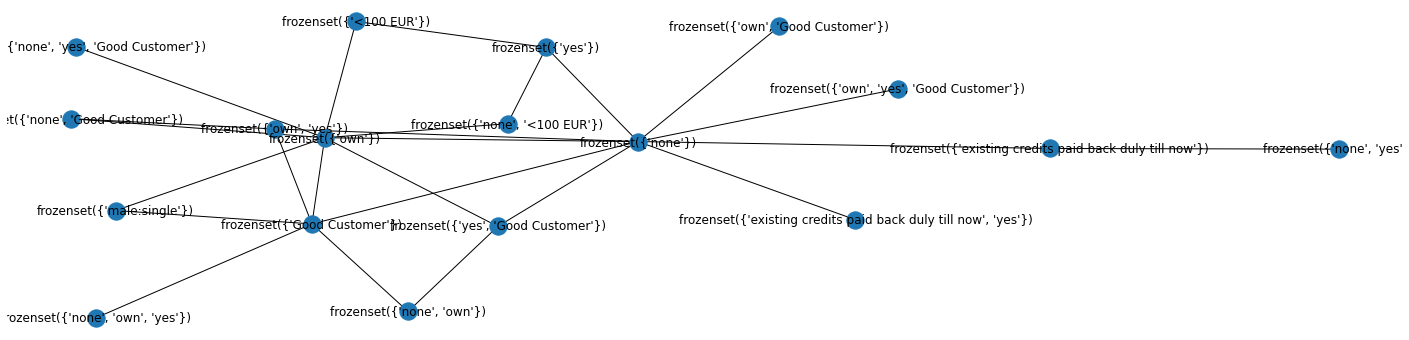

In [ ]:
import networkx as nx
import warnings
import matplotlib.pyplot as plt
fig, ax=plt.subplots(figsize=(25,6))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()   #https://www.kaggle.com/bbhatt001/bakery-business-model-association-rules

In [ ]:
#If I use min_support=0.4 I saw some patterns between columns I saw that male and single people have own house more than others.
#most of people have own house have Savings account/bonds less than 100 euro



In [ ]:
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

In [ ]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))   
frequent_itemsets[(frequent_itemsets['length']!=1)&(frequent_itemsets['support'] >= 0.2)]

,support,itemsets,length
7,0.586,"(none, <100 EUR)",2
8,0.430,"(<100 EUR, own)",2
9,0.581,"(<100 EUR, yes)",2
10,0.402,"(male:single, Good Customer)",2
11,0.687,"(none, Good Customer)",2
12,0.527,"(own, Good Customer)",2
13,0.667,"(Good Customer, yes)",2
14,0.521,"(existing credits paid back duly till now, none)",2
15,0.510,"(existing credits paid back duly till now, yes)",2
16,0.535,"(none, male:single)",2


# CLUSTERING


Agglomerative Hierarchical Clustering

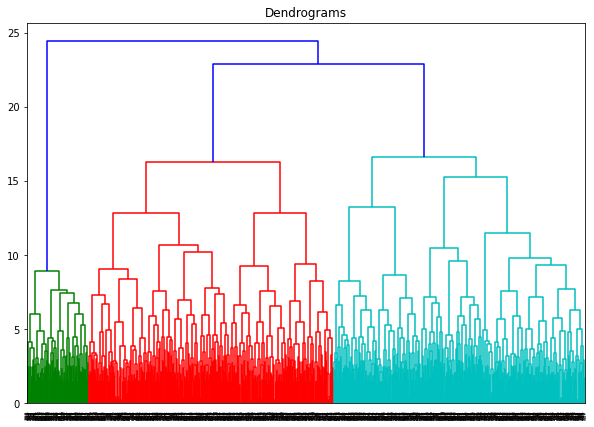

In [ ]:
lastdata=dfx_processed
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(lastdata, method='ward'))

In [ ]:

hcluster = AgglomerativeClustering(affinity='euclidean', linkage='ward')  
hcp=hcluster.fit_predict(lastdata)
print('Silhouette Score for Hieararchial Clustering for euclidean ward :'+str(silhouette_score(lastdata,hcp,metric='euclidean')))

hcluster = AgglomerativeClustering(affinity='euclidean', linkage='average')  
hcp=hcluster.fit_predict(lastdata)
print('Silhouette Score for Hieararchial Clustering for euclidean average:'+str(silhouette_score(lastdata,hcp,metric='euclidean')))

hcluster = AgglomerativeClustering(affinity='euclidean', linkage='complete')  
hcp=hcluster.fit_predict(lastdata)
print('Silhouette Score for Hieararchial Clustering for euclidean complete:'+str(silhouette_score(lastdata,hcp,metric='euclidean')))

hcluster = AgglomerativeClustering(affinity='euclidean', linkage='single')  
hcp=hcluster.fit_predict(lastdata)
print('Silhouette Score for Hieararchial Clustering for euclidean single:'+str(silhouette_score(lastdata,hcp,metric='euclidean')))

hcluster = AgglomerativeClustering(affinity='manhattan', linkage='average')  
hcp=hcluster.fit_predict(lastdata)
print('Silhouette Score for Hieararchial Clustering for manhattan average:'+str(silhouette_score(lastdata,hcp,metric='manhattan')))

hcluster = AgglomerativeClustering( affinity='manhattan', linkage='complete')  
hcp=hcluster.fit_predict(lastdata)
print('Silhouette Score for Hieararchial Clustering for manhattan complete:'+str(silhouette_score(lastdata,hcp,metric='manhattan')))

hcluster = AgglomerativeClustering(affinity='manhattan', linkage='single')  
hcp=hcluster.fit_predict(lastdata)
print('Silhouette Score for Hieararchial Clustering for manhattan single:'+str(silhouette_score(lastdata,hcp,metric='manhattan')))


Silhouette Score for Hieararchial Clustering for euclidean ward :0.08804982714006784
Silhouette Score for Hieararchial Clustering for euclidean average:0.12582791075794267
Silhouette Score for Hieararchial Clustering for euclidean complete:0.05554241925102699
Silhouette Score for Hieararchial Clustering for euclidean single:0.11258762395269756
Silhouette Score for Hieararchial Clustering for manhattan average:0.19479182483285978
Silhouette Score for Hieararchial Clustering for manhattan complete:0.029909124149889953
Silhouette Score for Hieararchial Clustering for manhattan single:0.19217942519009615


K-Means Clustering


Silhouette score for 2 clusters k-means : 0.331 
Silhouette score for 3 clusters k-means : 0.219 
Silhouette score for 4 clusters k-means : 0.174 
Silhouette score for 5 clusters k-means : 0.16 
Silhouette score for 6 clusters k-means : 0.174 
Silhouette score for 7 clusters k-means : 0.171 
Silhouette score for 8 clusters k-means : 0.158 
0    359
2    321
1    320
Name: Clusters, dtype: int64


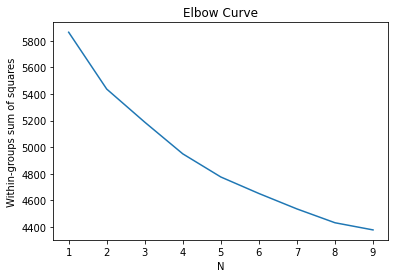

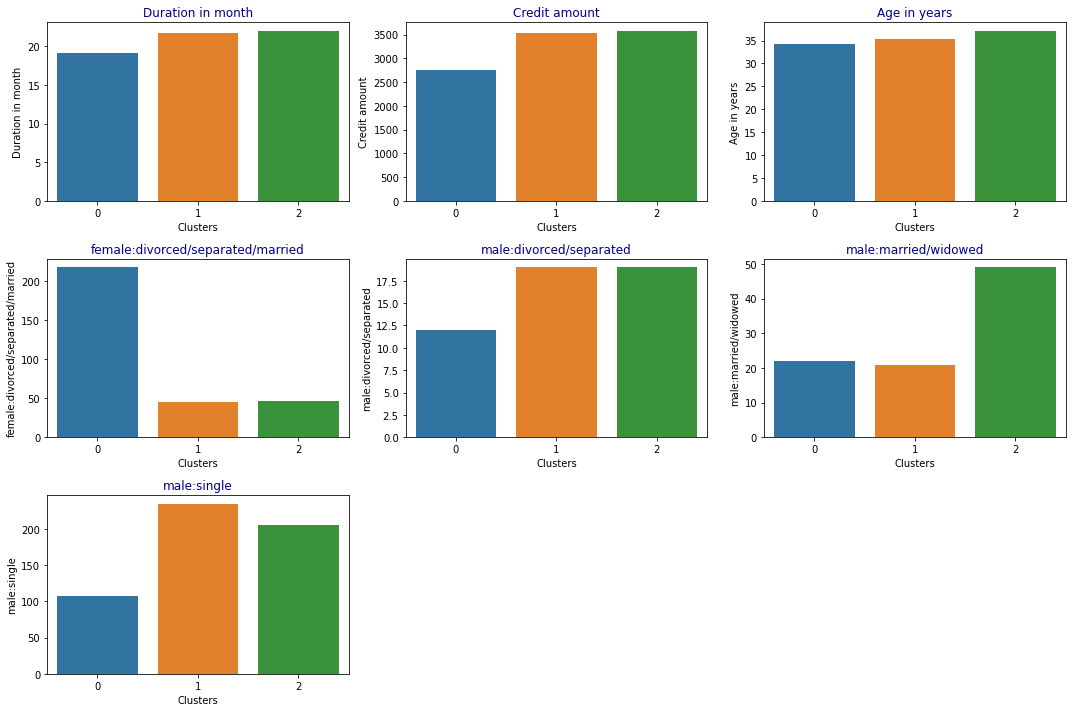

In [ ]:


error_rates = []


for N in range(1, 10):
    kmeans = KMeans(n_clusters=N).fit(lastdata)
    error_rates.append(kmeans.inertia_)

ax = sns.lineplot(x=list(range(1, 10)), y=error_rates)
ax.set(xlabel='N', ylabel='Within-groups sum of squares', title='Elbow Curve')


lastdata['Clusters']=list(kmeans.labels_)
customers=pd.DataFrame(lastdata['Clusters'].value_counts()).rename(columns={'Clusters':'Number of Customers'})



from sklearn.metrics import silhouette_samples, silhouette_score
for i in range(2,9):
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(lastdata)
    print("Silhouette score for {} clusters k-means : {} ".format(i,silhouette_score(lastdata,kmeans_labels, metric='euclidean').round(3)))


kmeans_labels=KMeans(n_clusters=3,random_state=123).fit_predict(lastdata)

lastdata['Clusters']=list(kmeans_labels)
customers=pd.DataFrame(lastdata['Clusters'].value_counts()).rename(columns={'Clusters':'Number of Customers'})
customers.T


datafirst=df[['Duration in month','Purpose','Credit amount','Personal status and sex','Age in years','Present employment since','Credit history']]
datafirst.head()
data2= datafirst.join(lastdata[["Clusters"]])

data2.head()

datapurpose=data2.pivot_table(index='Clusters', columns=['Personal status and sex'],aggfunc='count',values='Duration in month',fill_value=0)

datapurpose

count=lastdata["Clusters"].value_counts()
print(count)

lastdata.set_index('Clusters')
groupedmean=data2.groupby(by='Clusters').mean().round(1)
groupnumeric=groupedmean.iloc[:,[0,1,2]]
groupnumeric

dsonuc=groupnumeric.join(datapurpose)
#dsonuc=dsonuc.join(datapurpose2)
features=dsonuc
#["Duration in month","Credit amount","Installment rate in percentage of disposable income","Present residence since","Age in years","Number of existing credits at this bank","Number of people being liable to provide maintenance for"]
plt.figure(figsize=(15,10))
for i,j in enumerate(features):
    plt.subplot(3,3,i+1)
    sns.barplot(dsonuc.index,dsonuc[j])
    plt.title(j,fontdict={'color':'darkblue'})
plt.tight_layout()
plt.show()

In [ ]:
data2

,Duration in month,Purpose,Credit amount,Personal status and sex,Age in years,Present employment since,Credit history,Clusters
0,6,radio/television,1169,male:single,67,>=7 years,critical account,0
1,48,radio/television,5951,female:divorced/separated/married,22,1<= < 4 years,existing credits paid back duly till now,2
2,12,education,2096,male:single,49,4<= <7 years,critical account,0
3,42,furniture/equipment,7882,male:single,45,4<= <7 years,existing credits paid back duly till now,1
4,24,car (new),4870,male:single,53,1<= < 4 years,delay in paying off,2
...,...,...,...,...,...,...,...,...
995,12,furniture/equipment,1736,female:divorced/separated/married,31,4<= <7 years,existing credits paid back duly till now,0
996,30,car (used),3857,male:divorced/separated,40,1<= < 4 years,existing credits paid back duly till now,1
997,12,radio/television,804,male:single,38,>=7 years,existing credits paid back duly till now,1
998,45,radio/television,1845,male:single,23,1<= < 4 years,existing credits paid back duly till now,2
